In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import anderson
import scipy as scipy
import seaborn as sns
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
from scipy.stats import shapiro

In [21]:
#data = np.genfromtxt('./data/18_pdf_19.csv', delimiter=',')
#data = np.genfromtxt('./data/data_test.csv', delimiter=',')
#data_all = pd.read_csv("./data/18_pdf_18_all.csv")
#data_all = pd.read_csv("./data/test_3.csv")
data_handle = pd.read_csv('./data/set104.csv')
print (data_handle)

         X    Y  PCI  RSRP
0      724  117   41 -74.4
1      724  117   41 -75.1
2      724  117   41 -74.3
3      724  117   41 -72.4
4      724  117   41 -73.2
5      724  117   41 -73.1
6      724  117   41 -72.5
7      724  117   41 -72.5
8      724  117   41 -71.9
9      724  117   41 -72.3
10     724  117   41 -73.9
11     724  117   41 -71.2
12     724  117   41 -70.4
13     724  117   41 -69.7
14     724  117   41 -70.3
15     724  117   41 -72.0
16     724  117   41 -70.1
17     724  117   41 -69.8
18     724  117   41 -71.3
19     724  117   41 -71.8
20     724  117   41 -71.3
21     724  117   41 -69.8
22     724  117   41 -68.8
23     724  117   41 -68.6
24     724  117   41 -68.6
25     724  117   41 -68.5
26     724  117   41 -68.6
27     724  117   41 -69.0
28     724  117   41 -69.9
29     724  117   41 -69.6
...    ...  ...  ...   ...
98161  724  117   41 -72.7
98162  724  117   41 -72.6
98163  724  117   41 -72.6
98164  724  117   41 -72.8
98165  724  117   41 -72.6
9

In [3]:
def number_drift(data):
    
    x = np.arange(0,10,1)
    sigma = 1
    def norm_pdf(x,mu,sigma):
        pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi))    
        return pdf

    mu = 0    
    plt.hist(data, bins=100, alpha=0.7)
    y = norm_pdf(x, mu, sigma)
    #plt.plot(x,y, color='orange', lw=3)
    plt.show()
    
    sns.distplot(data)

KeyboardInterrupt: 

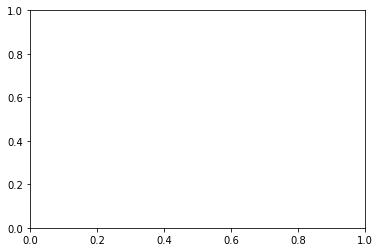

In [5]:
number_drift(data_handle)

In [ ]:
def group(data_all):
    X_group_mean = data_all.groupby('PCI').mean()
    X_group_std = data_all.groupby('PCI').std()
    X_group_median = data_all.groupby('PCI').median()
    #X_group_mean = data_all.mean()
    #X_group_std = data_all.std()
    #X_group_median = data_all.median()
    print (X_group_mean)
    print (X_group_std)
    print (X_group_median)
    return X_group_mean,X_group_std

In [ ]:
#X_group_mean,X_group_std = group(data_all)
#group(data_all)

In [ ]:
#x = np.linspace(-15, 15, 9)
x = np.array([1,1,1,1,1,100,100,50,23,19])
#np.savetxt('x.csv', x, delimiter=',', fmt='%f')
#anderson(data, dist ='norm' )
scipy.stats.scoreatpercentile(data, 95)


In [ ]:
print (scipy.stats.normaltest (data, axis=0))
k2,p = scipy.stats.normaltest (data, axis=0)
alpha = 0.05
if p < alpha:
    print("Sample does not look Gaussian (reject H0),NOT")
else:
    print("Sample looks Gaussian (fail to reject H0),YES Gaussian!!")

In [ ]:
scipy.stats.shapiro(data)

In [ ]:
##### Anderson-Darling Test #####
# seed the random number generator
seed(1)
# normality test
#data = 5 * randn(100) + 50
result = anderson(data)

print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [ ]:
##### D’Agostino’s K^2 Test #####
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

In [ ]:
##### Shapiro-Wilk Test #####
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

In [22]:
def group_drift(data_handle):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    group_mean = data_handle.groupby(['X','Y','PCI']).mean()
    group_drift = data_handle.groupby(['X','Y','PCI']).transform(lambda x: x - x.mean())
    return group_mean,group_drift

In [23]:
group_mean,group_drift = group_drift(data_handle)
print (group_mean)
group_mean.to_csv('group_mean.csv')

                  RSRP
X   Y   PCI           
724 117 41  -71.856859


In [24]:
print (group_drift)

           RSRP
0     -2.543141
1     -3.243141
2     -2.443141
3     -0.543141
4     -1.343141
5     -1.243141
6     -0.643141
7     -0.643141
8     -0.043141
9     -0.443141
10    -2.043141
11     0.656859
12     1.456859
13     2.156859
14     1.556859
15    -0.143141
16     1.756859
17     2.056859
18     0.556859
19     0.056859
20     0.556859
21     2.056859
22     3.056859
23     3.256859
24     3.256859
25     3.356859
26     3.256859
27     2.856859
28     1.956859
29     2.256859
...         ...
98161 -0.843141
98162 -0.743141
98163 -0.743141
98164 -0.943141
98165 -0.743141
98166 -0.843141
98167 -0.943141
98168 -0.943141
98169 -0.743141
98170 -0.943141
98171 -0.943141
98172 -1.243141
98173 -0.943141
98174 -1.043141
98175 -1.143141
98176 -1.343141
98177 -1.043141
98178 -0.843141
98179 -0.443141
98180 -0.543141
98181 -1.243141
98182 -3.943141
98183 -1.343141
98184 -1.543141
98185 -1.443141
98186 -2.743141
98187 -0.043141
98188  0.356859
98189  0.256859
98190  1.056859

[98191 

In [ ]:
print(group_drift[11841:11884])  
group_drift.to_csv('group_drift.csv')

In [ ]:
#data = np.genfromtxt('./data/data_test.csv', delimiter=',')

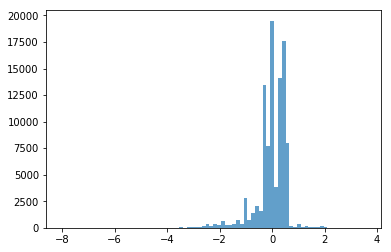

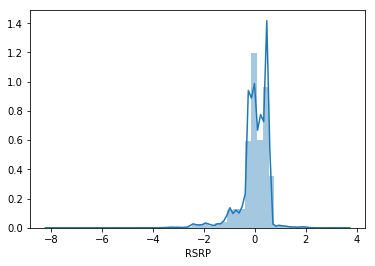

In [25]:
def number_drift(group_drift):
    
    x = np.arange(0,10,1)
    sigma = 1
    def norm_pdf(x,mu,sigma):
        pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi))    
        return pdf

    mu = 0    
    plt.hist(group_drift, bins=80, alpha=0.7)
    y = norm_pdf(x, mu, sigma)
    #plt.plot(x,y, color='orange', lw=3)
    plt.show()
    
    sns.distplot(group_drift)
number_drift(group_drift['RSRP'])

In [26]:
##### Shapiro-Wilk Test #####
# normality test
stat, p = shapiro(group_drift['RSRP'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.818, p=0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.5/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [20]:
##### D’Agostino’s K^2 Test #####
# normality test
stat, p = normaltest(group_drift)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=185280.594, p=0.000
Sample does not look Gaussian (reject H0)
